In [6]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\user\OneDrive\桌面\0929 Correct sampler\0923 preprocess_33W.csv')


In [19]:
from sklearn.cluster import KMeans

X = df.drop('diabetes', axis=1)

inertia_list = []
# Declaring Model要分成幾群
for i in range(1,15):
    km = KMeans(n_clusters=i) 
    km.fit(X)
    print(f'分群準確性 {i}群 : ', km.inertia_)
    inertia_list.append(km.inertia_)
# print(min(inertia_list))
# inertia_ 值越小，分群準確性越好

分群準確性 1群 :  2820619375487751.5
分群準確性 2群 :  1459838162451838.5
分群準確性 3群 :  802134421637064.4
分群準確性 4群 :  506725359822762.6
分群準確性 5群 :  306231981168562.0
分群準確性 6群 :  185882872467516.44
分群準確性 7群 :  138547363753015.48
分群準確性 8群 :  107375031957642.3
分群準確性 9群 :  82704123274353.7
分群準確性 10群 :  68281563851429.38
分群準確性 11群 :  56904181107384.51
分群準確性 12群 :  47245100302348.54
分群準確性 13群 :  41617991207710.26
分群準確性 14群 :  35213258981504.1
35213258981504.1


<AxesSubplot:>

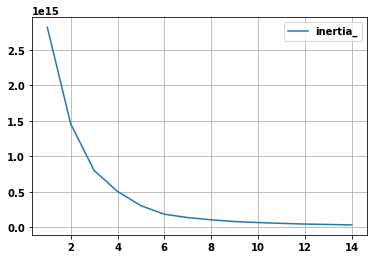

In [20]:
# plot
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = inertia_list
df_kmeans.index = list(range(1, 15))
df_kmeans.plot(grid = True)

In [42]:
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)

KMeans(n_clusters=3)

In [43]:
print('分群的預測結果 : ')
pred = kmeans.fit_predict(df)
pred

分群的預測結果 : 


array([0, 0, 0, ..., 0, 0, 0])

In [23]:
# 預測結果輸出
# all_predictions_series = pd.Series(pred)
# all_predictions_series.to_csv('1005 K-means 3 clusters.csv', index = None)

<AxesSubplot:xlabel='BMI', ylabel='HRV_SDNN'>

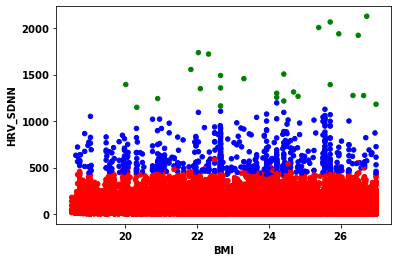

In [44]:
df1 = df.copy()
df1['pred'] = pred
c = {0:'r',1:'g',2:'b'}
df1['colors'] = df1['pred'].map(c)
df1.plot(kind='scatter', x='BMI' , y='HRV_SDNN' ,c=df1['colors'])